In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('Data.csv')
df = df[:10000]

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


positive    5028
negative    4972
Name: sentiment, dtype: int64


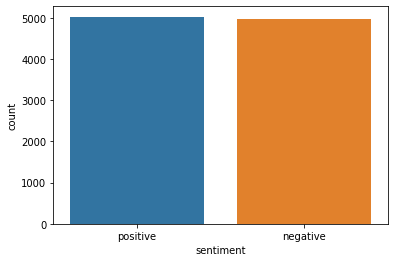

In [4]:
sns.countplot(x=df['sentiment']);
print(df['sentiment'].value_counts())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
df.duplicated().sum()

17

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

## Lower Case Everything

In [9]:
df['review'] = df['review'].str.lower()

In [10]:
df.iloc[18][0]

'i remember this film,it was the first film i had watched at the cinema the picture was dark in places i was very nervous it was back in 74/75 my dad took me my brother & sister to newbury cinema in newbury berkshire england. i recall the tigers and the lots of snow in the film also the appearance of grizzly adams actor dan haggery i think one of the tigers gets shot and dies. if anyone knows where to find this on dvd etc please let me know.the cinema now has been turned in a fitness club which is a very big shame as the nearest cinema now is 20 miles away, would love to hear from others who have seen this film or any other like it.'

# Remove Numbers From Text

In [11]:
def remove_numbers(text):
    pattern = r'[0-9]'
    new_string = re.sub(pattern, '', text)
    return new_string

remove_numbers(df.iloc[18][0])

'i remember this film,it was the first film i had watched at the cinema the picture was dark in places i was very nervous it was back in / my dad took me my brother & sister to newbury cinema in newbury berkshire england. i recall the tigers and the lots of snow in the film also the appearance of grizzly adams actor dan haggery i think one of the tigers gets shot and dies. if anyone knows where to find this on dvd etc please let me know.the cinema now has been turned in a fitness club which is a very big shame as the nearest cinema now is  miles away, would love to hear from others who have seen this film or any other like it.'

In [12]:
df['review'] = df['review'].apply(lambda x: remove_numbers(x))

In [13]:
df.iloc[50][0]

'return to the th chamber is one of those classic kung-fu movies which shaw produces back in the s and s, whose genre is equivalent to the spaghetti westerns of hollywood, and the protagonist gordon liu, the counterpart to the western\'s clint eastwood. digitally remastered and a new print made for the fantastic film fest, this is "presented in shaw scope", just like the good old days.<br /><br />this film is a simple story of good versus evil, told in  acts, which more or less sums up the narrative of martial arts films in that era.<br /><br />act one sets up the premise. workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by % by incoming manchu gangsters. they can\'t do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. at first they had a minor success in getting liu to impersonate a highly skilled shaolin monk (one of the best comedy sequences), but their rouse got exposed wh

# Remove Html Tags

In [14]:
def remove_tags(text):
    p = re.compile(r'<.*?>')
    return p.sub('', text)

remove_tags(df.iloc[50][0])

'return to the th chamber is one of those classic kung-fu movies which shaw produces back in the s and s, whose genre is equivalent to the spaghetti westerns of hollywood, and the protagonist gordon liu, the counterpart to the western\'s clint eastwood. digitally remastered and a new print made for the fantastic film fest, this is "presented in shaw scope", just like the good old days.this film is a simple story of good versus evil, told in  acts, which more or less sums up the narrative of martial arts films in that era.act one sets up the premise. workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by % by incoming manchu gangsters. they can\'t do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. at first they had a minor success in getting liu to impersonate a highly skilled shaolin monk (one of the best comedy sequences), but their rouse got exposed when they pushed the limit

In [15]:
df['review'] = df['review'].apply(lambda x: remove_tags(x))

# Remove Special Char

In [16]:
def remove_spchar(text):
    return re.sub('\W+',' ', text )

remove_spchar(df.iloc[50][0])

'return to the th chamber is one of those classic kung fu movies which shaw produces back in the s and s whose genre is equivalent to the spaghetti westerns of hollywood and the protagonist gordon liu the counterpart to the western s clint eastwood digitally remastered and a new print made for the fantastic film fest this is presented in shaw scope just like the good old days this film is a simple story of good versus evil told in acts which more or less sums up the narrative of martial arts films in that era act one sets up the premise workers in a dye mill of a small village are unhappy with their lot having their wages cut by by incoming manchu gangsters they can t do much about their exploitation because none of them are martial arts skilled to take on the gangsters and their boss at first they had a minor success in getting liu to impersonate a highly skilled shaolin monk one of the best comedy sequences but their rouse got exposed when they pushed the limit of credibility by impe

In [17]:
df['review'] = df['review'].apply(lambda x: remove_spchar(x))

In [18]:
df.iloc[100][0]

'this short film that inspired the soon to be full length feature spatula madness is a hilarious piece that contends against similar cartoons yielding multiple writers the short film stars edward the spatula who after being fired from his job joins in the fight against the evil spoons this premise allows for some funny content near the beginning but is barely present for the remainder of the feature this film s minute running time is absorbed by some odd ball comedy and a small musical number unfortunately not much else lies below it the plot that is set up doesn t really have time to show but it s surely follows it plot better than many high budget hollywood films this film is worth watching at least a few times take it for what it is and don t expect a deep story '

# Spelling correction 

In [19]:
def spell_corrector(txt):
    return TextBlob(txt).correct().string
spell_corrector(df.iloc[101][0])

'okay last night august th i had the distinct displeasure of meeting mr van pebble at a showing of the film the mason family at the three penny in chicago as part of the chicago underground film festival here s what i have to say about it first of all the film is an obvious rip off of every kenneth anger roman pulaski oliver stone and merry william movie i ve ever seen second of all in a short q a session after the show mr van pebble immediately stated that he never made any contact with the actual mason family members or charlie himself calling them liar and saying he wanted nothing to do with them that the film was based on his van pebble s take on the trial having seen it all from his living room on to and in the news and i m assuming from the autobiography and the book helter skelter which were directly mimicked through the narrative so i had second dies on questions i asked if he was trying to present the outsider mt sex drugs and rock n roll version and not necessarily the true s

# Remove Stop Words

In [20]:
def stopwords_(text):
    new = []
    stop = stopwords.words('english')
    for i in text.split():
        if i not in stop:
            new.append(i)
    return " ".join(new)

In [21]:
df['review'] = df['review'].apply(lambda x: stopwords_(x))

In [22]:
df.iloc[19][0]

'awful film must real stinkers nominated golden globe taken story first famous female renaissance painter mangled beyond recognition complaint taken liberties facts story good would perfectly fine simply bizarre accounts true story artist would made far better film come dishwater dull script suppose enough naked people factual version hurriedly capped end summary artist life could saved couple hours favored rest film brevity'

# lemmatization

In [23]:
def lemmatization(text):
    wnl = WordNetLemmatizer()
    return " ".join([wnl.lemmatize(i,pos='v') for i in text.split()])
lemmatization(df.iloc[50][0])

'return th chamber one classic kung fu movies shaw produce back whose genre equivalent spaghetti westerns hollywood protagonist gordon liu counterpart western clint eastwood digitally remastered new print make fantastic film fest present shaw scope like good old days film simple story good versus evil tell act less sum narrative martial arts film era act one set premise workers dye mill small village unhappy lot wag cut incoming manchu gangsters much exploitation none martial arts skilled take gangsters boss first minor success get liu impersonate highly skilled shaolin monk one best comedy sequence rouse get expose push limit credibility impersonate one many time act two show protagonist want get back mob however without real martial arts embark journey shaolin temple try infiltrate learn martial arts sly slapstick moments finally get accept abbot impersonate disappoint teach methods kinda like mr miyagi style karate kid instead paint fence get erect scaffold around temple nothing kee

In [24]:
df['review'] = df['review'].apply(lambda x: lemmatization(x))

In [25]:
df.iloc[19][0]

'awful film must real stinkers nominate golden globe take story first famous female renaissance painter mangle beyond recognition complaint take liberties facts story good would perfectly fine simply bizarre account true story artist would make far better film come dishwater dull script suppose enough naked people factual version hurriedly cap end summary artist life could save couple hours favor rest film brevity'

# Tokenization 

In [26]:
df.iloc[0][0]

'one reviewers mention watch oz episode hook right exactly happen first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death star dodgy deal shady agreements never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audiences forget charm forget romance oz mess around first episode ever saw strike nasty surreal say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfort

In [27]:
def tokenization(text):
    return word_tokenize(text)
tokenization(df.iloc[0][0])[:10]

['one',
 'reviewers',
 'mention',
 'watch',
 'oz',
 'episode',
 'hook',
 'right',
 'exactly',
 'happen']

In [28]:
# df['review'] = df['review'].apply(lambda x: tokenization(x))

In [29]:
df.head()

,review,sentiment
0,one reviewers mention watch oz episode hook ri...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stun fi...,positive


# Label Encoding on target data

In [30]:
X = df['review']
y = df['sentiment']

In [31]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [32]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [33]:
encoder.classes_

array(['negative', 'positive'], dtype=object)

In [34]:
encoder.get_params()

{}

In [35]:
encoder.transform(['positive','negative'])

array([1, 0])

# Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Bag of Words 

In [37]:
cv = CountVectorizer(max_features=3000)
X_train_bow = cv.fit_transform(X_train)
X_test_bow = cv.transform(X_test)

In [38]:
cv.vocabulary_.__len__()

3000

In [39]:
X_train_bow.shape

(6988, 3000)

In [40]:
def pipeline(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train.toarray(),y_train)
    y_pred = model.predict(X_test.toarray())
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    

In [41]:
pipeline(RandomForestClassifier(), X_train_bow, X_test_bow, y_train, y_test)

[[1269  246]
 [ 216 1264]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1515
           1       0.84      0.85      0.85      1480

    accuracy                           0.85      2995
   macro avg       0.85      0.85      0.85      2995
weighted avg       0.85      0.85      0.85      2995



In [42]:
pipeline(GaussianNB(), X_train_bow, X_test_bow, y_train, y_test)

[[1275  240]
 [ 512  968]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1515
           1       0.80      0.65      0.72      1480

    accuracy                           0.75      2995
   macro avg       0.76      0.75      0.75      2995
weighted avg       0.76      0.75      0.75      2995



# TF-IDF 

In [43]:
tf = TfidfVectorizer(max_features=3000)
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [44]:
X_train_tf.toarray()[0].max()

0.35678870613651004

In [132]:
# while dealing with sparse matrix we have use toarray() function
def pipeline(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

In [46]:
pipeline(RandomForestClassifier(), X_train_bow, X_test_bow, y_train, y_test)

[[1280  235]
 [ 226 1254]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1515
           1       0.84      0.85      0.84      1480

    accuracy                           0.85      2995
   macro avg       0.85      0.85      0.85      2995
weighted avg       0.85      0.85      0.85      2995



In [47]:
pipeline(GaussianNB(), X_train_bow, X_test_bow, y_train, y_test)

[[1275  240]
 [ 512  968]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1515
           1       0.80      0.65      0.72      1480

    accuracy                           0.75      2995
   macro avg       0.76      0.75      0.75      2995
weighted avg       0.76      0.75      0.75      2995



# Word 2 Vec 

In [80]:
import gensim

In [81]:
model = gensim.models.Word2Vec(window=10,epochs=10)

In [82]:
story = []
for sentence in X_train:
        story.append(sentence.split())

In [83]:
story.__len__()

6988

In [84]:
model.build_vocab(story)

In [85]:
model.corpus_count

6988

In [86]:
model.epochs

10

In [87]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

(7357983, 8308490)

In [90]:
model.wv['hello']

array([-0.08155759, -0.02646113, -0.0181236 , -0.00223195,  0.06550793,
       -0.15586951,  0.11917827,  0.1428683 , -0.08202509, -0.00083696,
       -0.35730204, -0.33576408, -0.1606239 ,  0.08100852,  0.04568855,
       -0.28629366,  0.09958687, -0.23420781, -0.06196318, -0.23893188,
        0.08454518,  0.03959716,  0.06367743, -0.2022018 ,  0.18958445,
        0.16027468, -0.13467705, -0.22844289, -0.17985374, -0.09119876,
        0.16089247,  0.2345047 , -0.04691614, -0.01211203,  0.0347589 ,
        0.04246079, -0.2678431 , -0.14975177, -0.03471247, -0.28542876,
       -0.14047621, -0.23658264,  0.07626662,  0.0383556 , -0.03849578,
       -0.1697866 , -0.0962144 , -0.06441932,  0.04341586,  0.12608145,
        0.02437113, -0.2670398 , -0.22649124,  0.06036743, -0.23656262,
        0.11191633, -0.04728888,  0.00217309, -0.30380473, -0.14563763,
       -0.04894198,  0.08000051, -0.04986767, -0.0466726 , -0.2982072 ,
        0.13572128, -0.08180316,  0.02510879, -0.1125625 ,  0.06

In [92]:
model.wv.key_to_index

{'film': 0,
 'movie': 1,
 'one': 2,
 'make': 3,
 'like': 4,
 'see': 5,
 'get': 6,
 'time': 7,
 'good': 8,
 'character': 9,
 'go': 10,
 'watch': 11,
 'would': 12,
 'even': 13,
 'think': 14,
 'story': 15,
 'well': 16,
 'show': 17,
 'really': 18,
 'look': 19,
 'say': 20,
 'know': 21,
 'much': 22,
 'bad': 23,
 'end': 24,
 'great': 25,
 'people': 26,
 'first': 27,
 'come': 28,
 'play': 29,
 'take': 30,
 'give': 31,
 'also': 32,
 'love': 33,
 'act': 34,
 'way': 35,
 'movies': 36,
 'find': 37,
 'could': 38,
 'work': 39,
 'seem': 40,
 'little': 41,
 'never': 42,
 'plot': 43,
 'many': 44,
 'best': 45,
 'two': 46,
 'want': 47,
 'life': 48,
 'try': 49,
 'better': 50,
 'ever': 51,
 'still': 52,
 'man': 53,
 'scene': 54,
 'scenes': 55,
 'feel': 56,
 'something': 57,
 'lot': 58,
 'use': 59,
 'part': 60,
 'back': 61,
 'real': 62,
 'interest': 63,
 'guy': 64,
 'director': 65,
 'actors': 66,
 'star': 67,
 'years': 68,
 'tell': 69,
 'thing': 70,
 'actually': 71,
 'leave': 72,
 'though': 73,
 'funny': 74

In [93]:
def documnet_vector(doc):
    doc = [word for word in doc.split() if word in model.wv.key_to_index]
    return np.mean(model.wv[doc],axis=0)

In [95]:
documnet_vector('hello i am here')

array([-0.08155759, -0.02646113, -0.0181236 , -0.00223195,  0.06550793,
       -0.15586951,  0.11917827,  0.1428683 , -0.08202509, -0.00083696,
       -0.35730204, -0.33576408, -0.1606239 ,  0.08100852,  0.04568855,
       -0.28629366,  0.09958687, -0.23420781, -0.06196318, -0.23893188,
        0.08454518,  0.03959716,  0.06367743, -0.2022018 ,  0.18958445,
        0.16027468, -0.13467705, -0.22844289, -0.17985374, -0.09119876,
        0.16089247,  0.2345047 , -0.04691614, -0.01211203,  0.0347589 ,
        0.04246079, -0.2678431 , -0.14975177, -0.03471247, -0.28542876,
       -0.14047621, -0.23658264,  0.07626662,  0.0383556 , -0.03849578,
       -0.1697866 , -0.0962144 , -0.06441932,  0.04341586,  0.12608145,
        0.02437113, -0.2670398 , -0.22649124,  0.06036743, -0.23656262,
        0.11191633, -0.04728888,  0.00217309, -0.30380473, -0.14563763,
       -0.04894198,  0.08000051, -0.04986767, -0.0466726 , -0.2982072 ,
        0.13572128, -0.08180316,  0.02510879, -0.1125625 ,  0.06

In [125]:
data = []
for index, doc in enumerate(df['review'].values):
    data.append(documnet_vector(doc))

In [126]:
X = pd.DataFrame(data)

In [127]:
y = df['sentiment']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [129]:
X_train.shape

(6988, 100)

In [130]:
X_test.shape

(2995, 100)

In [133]:
pipeline(RandomForestClassifier(), X_train, X_test, y_train, y_test)

[[1215  300]
 [ 238 1242]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1515
           1       0.81      0.84      0.82      1480

    accuracy                           0.82      2995
   macro avg       0.82      0.82      0.82      2995
weighted avg       0.82      0.82      0.82      2995

